<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [43]:
data = pd.read_csv('pima-indians-diabetes.csv', names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])


<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<hr>
<a id="1"></a>
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Data Cleaning </p>

In [6]:
data.replace({'test': 0, 'skin': 0}, np.nan, inplace=True)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


In [7]:
data.isnull().sum()

preg       0
plas       0
pres       0
skin     227
test     374
mass       0
pedi       0
age        0
class      0
dtype: int64

In [8]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [9]:
nan_percent= missing_percent(data)
nan_percent

skin    29.557292
test    48.697917
dtype: float64

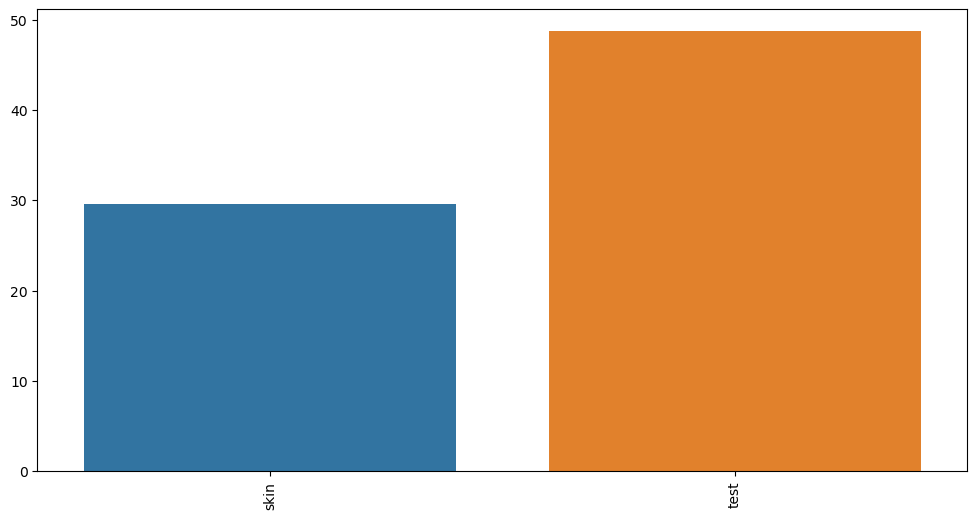

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

In [11]:
data_array = data[['test', 'skin']].values
knn_imputer = KNNImputer(n_neighbors=5)  
data_array_imputed = knn_imputer.fit_transform(data_array)
data[['test', 'skin']] = data_array_imputed

In [12]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


In [13]:
data['class'].value_counts()/data['class'].count()*100

class
0    65.104167
1    34.895833
Name: count, dtype: float64

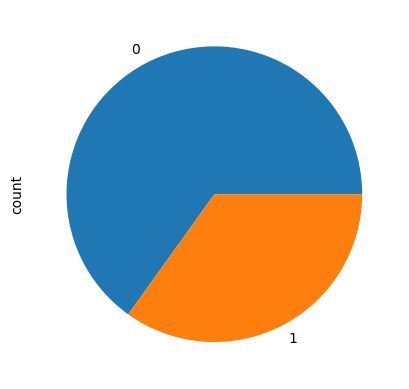

In [14]:
data['class'].value_counts().plot(kind='pie');

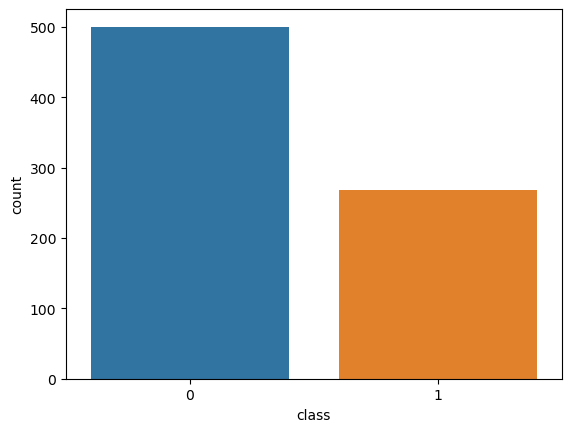

In [15]:
sns.countplot(data = data , x='class');

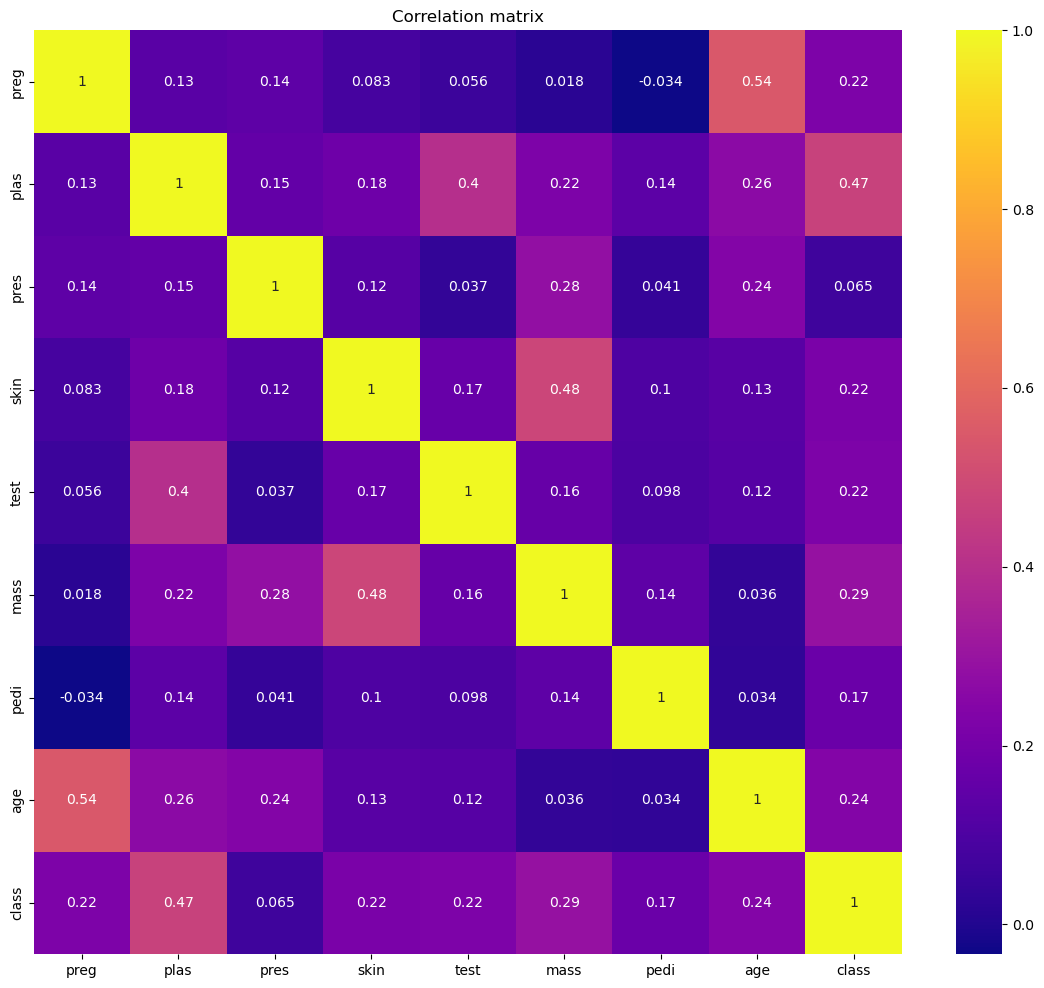

In [16]:
correlation = data.corr()
cols = data.columns
corr_matrix = data[cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title(f'Correlation matrix')
plt.show()

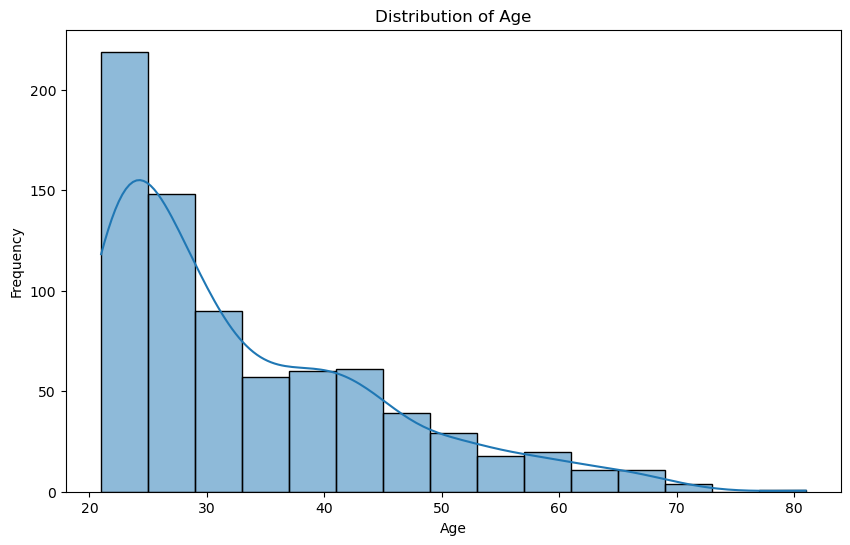

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

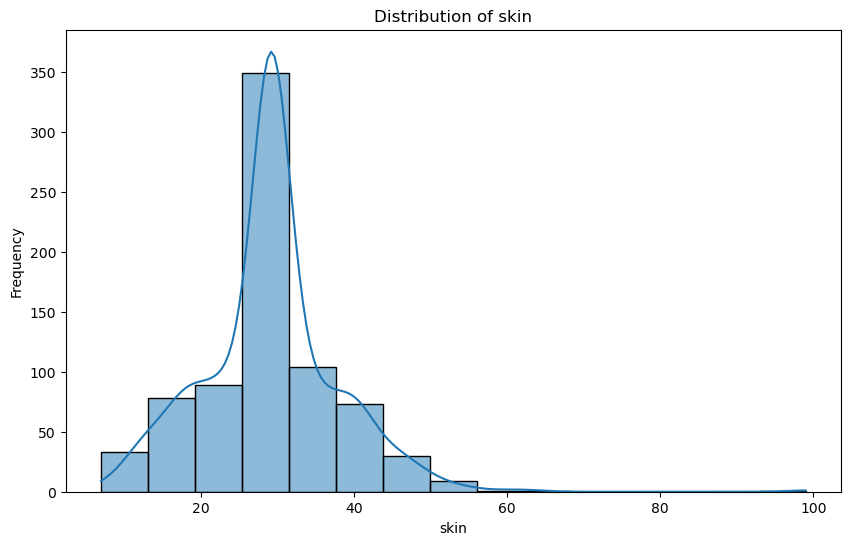

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['skin'], bins=15, kde=True)
plt.title('Distribution of skin')
plt.xlabel('skin')
plt.ylabel('Frequency')
plt.show()

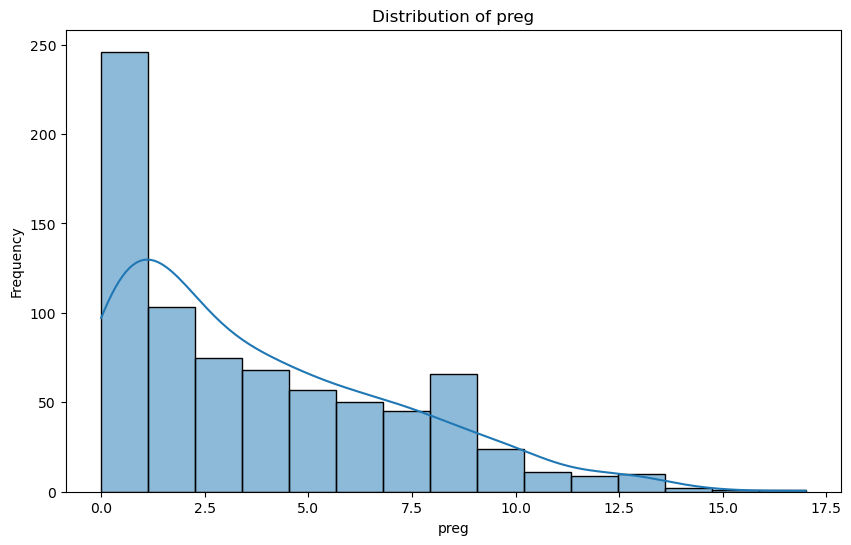

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['preg'], bins=15, kde=True)
plt.title('Distribution of preg')
plt.xlabel('preg')
plt.ylabel('Frequency')
plt.show()

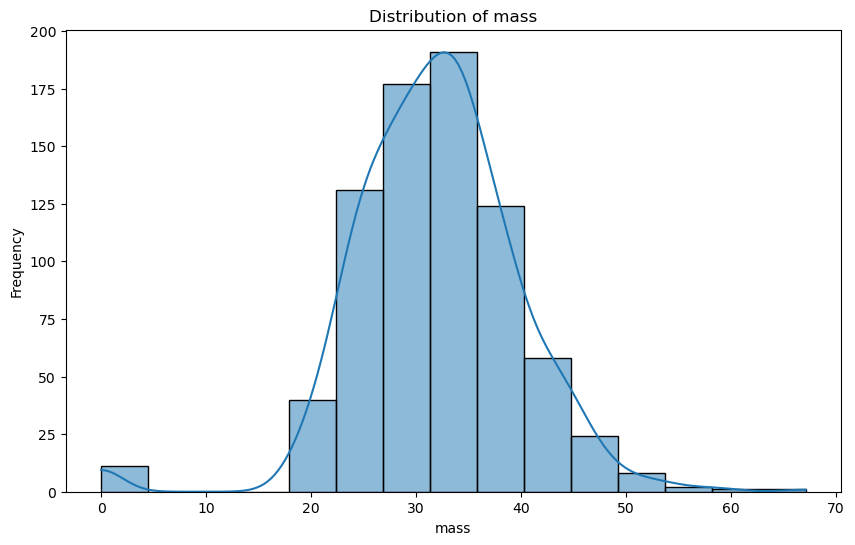

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['mass'], bins=15, kde=True)
plt.title('Distribution of mass')
plt.xlabel('mass')
plt.ylabel('Frequency')
plt.show()

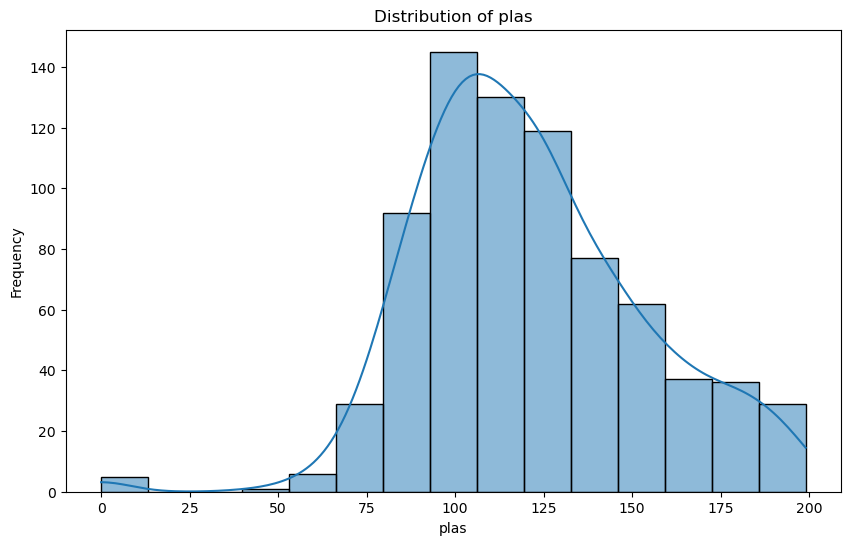

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['plas'], bins=15, kde=True)
plt.title('Distribution of plas')
plt.xlabel('plas')
plt.ylabel('Frequency')
plt.show()

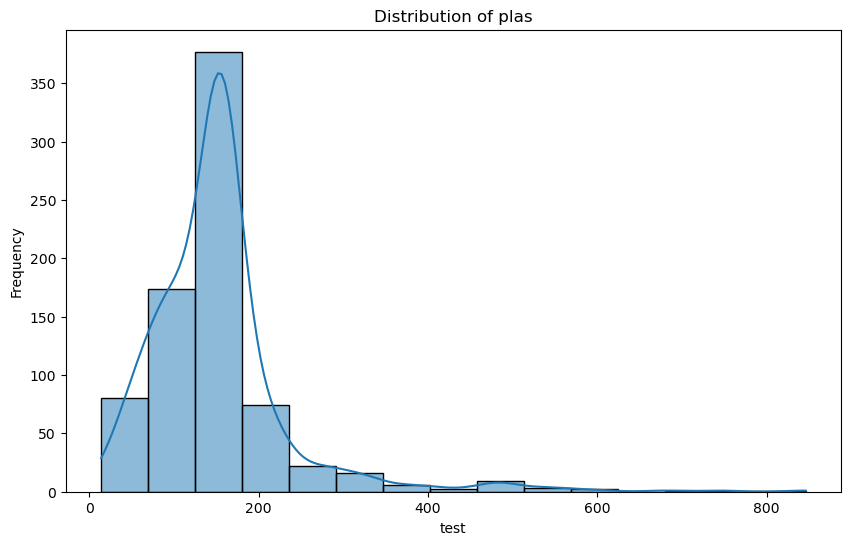

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['test'], bins=15, kde=True)
plt.title('Distribution of plas')
plt.xlabel('test')
plt.ylabel('Frequency')
plt.show()

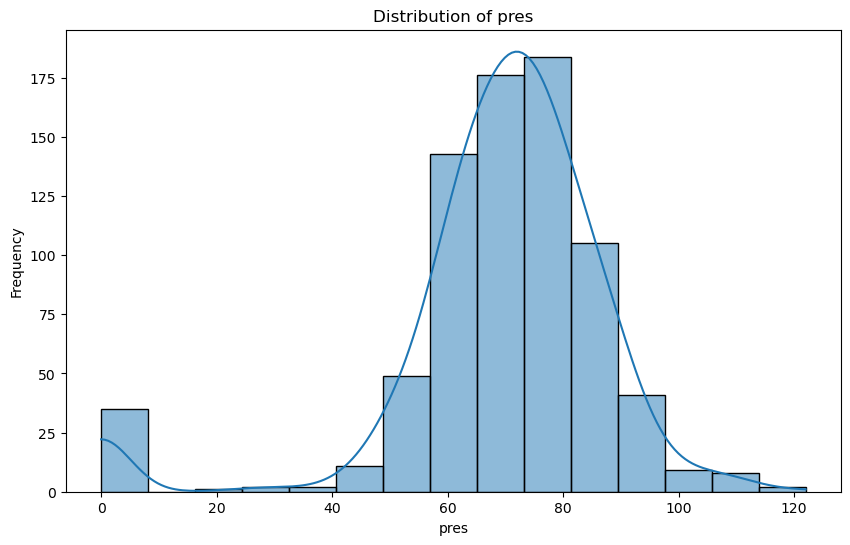

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['pres'], bins=15, kde=True)
plt.title('Distribution of pres')
plt.xlabel('pres')
plt.ylabel('Frequency')
plt.show()

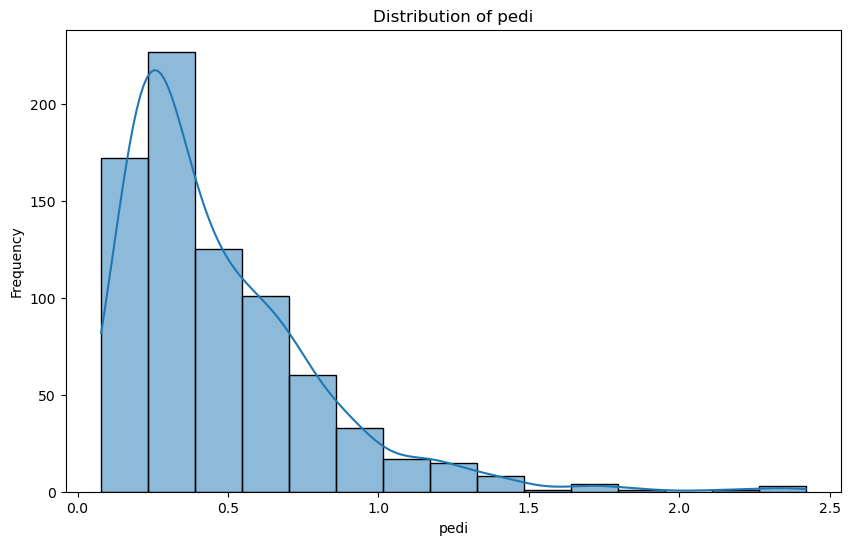

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['pedi'], bins=15, kde=True)
plt.title('Distribution of pedi')
plt.xlabel('pedi')
plt.ylabel('Frequency')
plt.show()

<a id="5"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧹 Preprocessing </p>

# Outliers

In [26]:
features = ['preg', 'plas', 'skin', 'test', 'mass', 'pedi', 'age']
features


['preg', 'plas', 'skin', 'test', 'mass', 'pedi', 'age']

In [27]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

preg     4
plas     5
skin    87
test    65
mass    19
pedi    29
age      9
dtype: int64

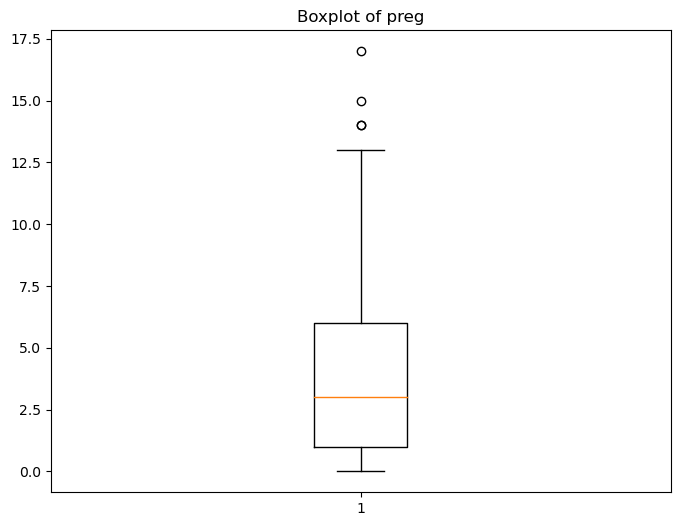

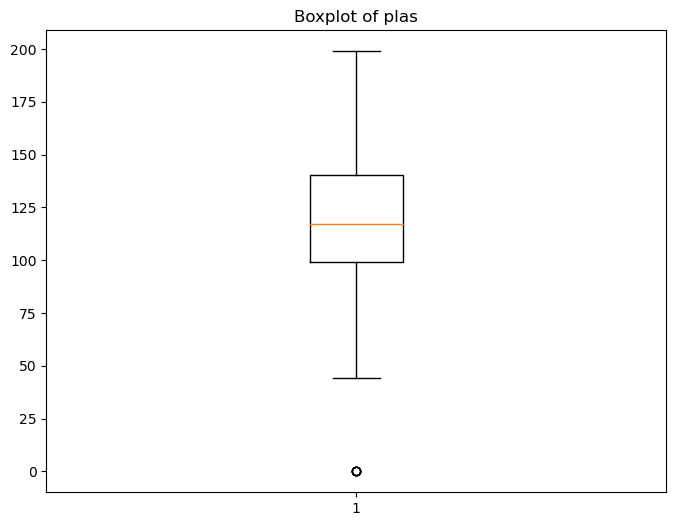

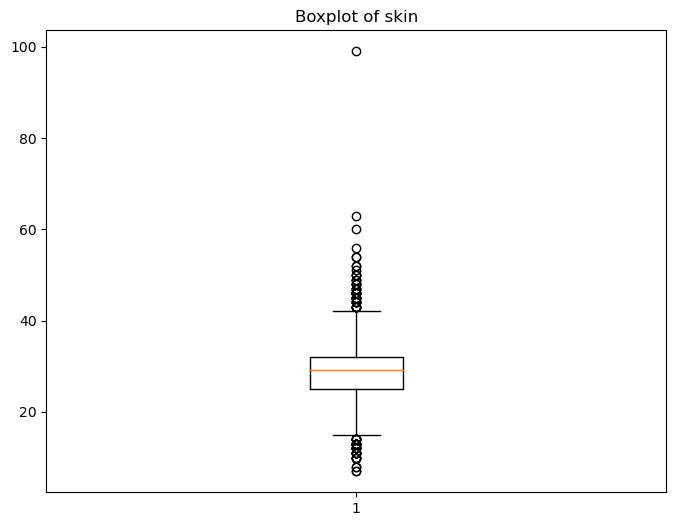

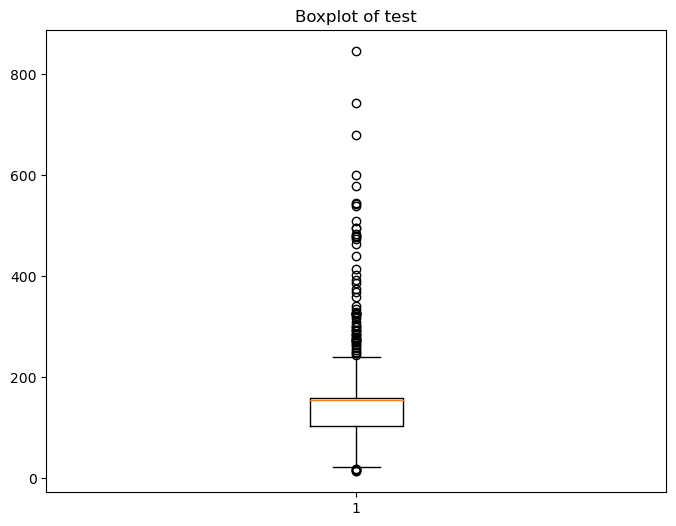

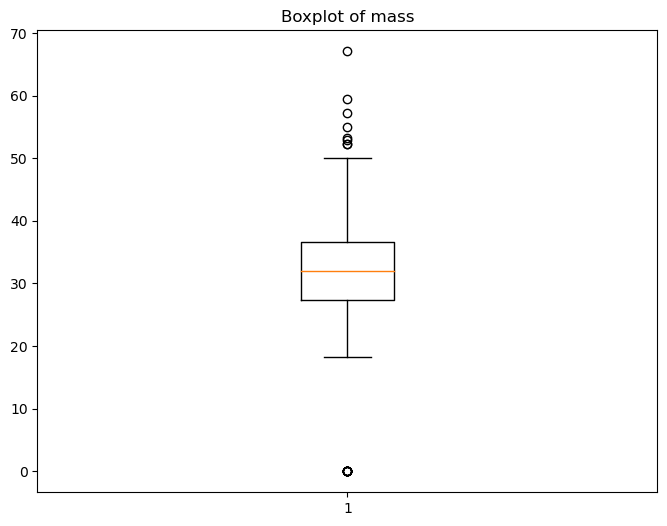

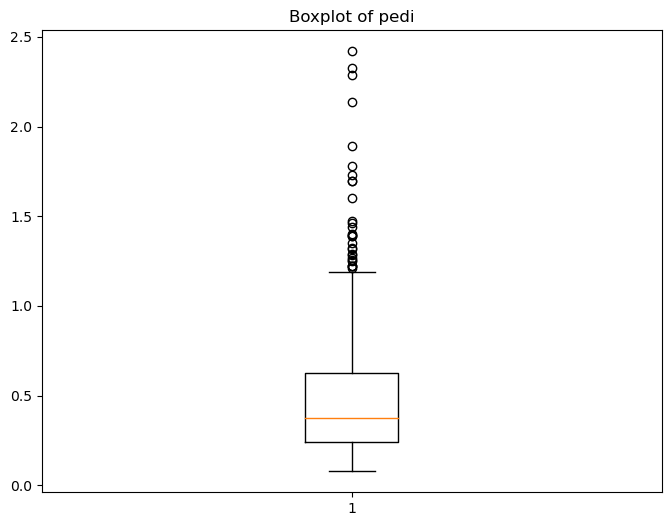

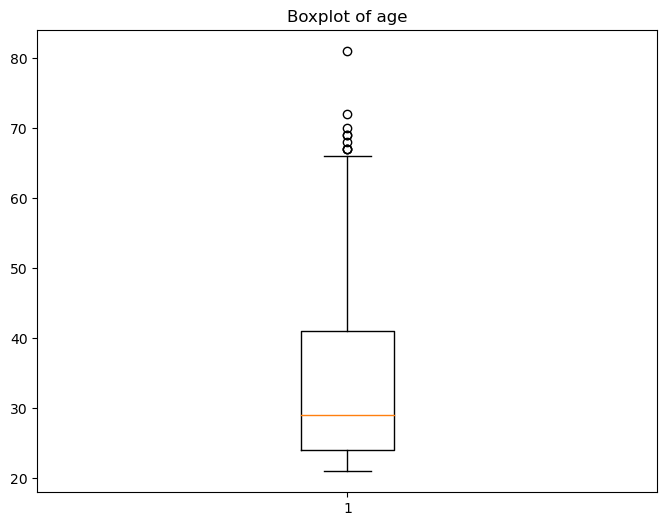

In [28]:
for i in features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


In [ ]:
# # Calculate IQR (Interquartile Range) for outlier detection
# Q1 = df[features].quantile(0.25)
# Q3 = df[features].quantile(0.75)
# IQR = Q3 - Q1

# # Define threshold for identifying outliers
# threshold = 1.5

# # Detect and handle outliers
# outliers = (df[features] < (Q1 - threshold * IQR)) | (df[features] > (Q3 + threshold * IQR))
# df = df[~outliers.any(axis=1)]

# OHE

In [30]:
y = pd.get_dummies(y)

<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [46]:
X = data.drop('class' , axis=1)
y = data['class']


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation = 'relu', input_shape = (8,)),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax'),

])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                99        
                                                                 
 dense_1 (Dense)             (None, 30)                360       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_activations = True, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [40]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
54/54 [==============================] - 0s 5ms/step - loss: 0.4413 - categorical_accuracy: 0.7989 - val_loss: 0.4670 - val_categorical_accuracy: 0.7749
Epoch 2/10
54/54 [==============================] - 0s 5ms/step - loss: 0.4417 - categorical_accuracy: 0.7933 - val_loss: 0.4655 - val_categorical_accuracy: 0.7792
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4379 - categorical_accuracy: 0.7970 - val_loss: 0.4707 - val_categorical_accuracy: 0.7706
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4433 - categorical_accuracy: 0.7784 - val_loss: 0.4649 - val_categorical_accuracy: 0.7706
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4342 - categorical_accuracy: 0.7896 - val_loss: 0.4643 - val_categorical_accuracy: 0.7749
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4380 - categorical_accuracy: 0.7896 - val_loss: 0.4691 - val_categorical_accuracy: 0.7879
Epoch 7/10
54/54

In [41]:
model.predict(X_test)[3]

8/8 [==============================] - 0s 2ms/step


array([0.44757125, 0.5524288 ], dtype=float32)